# EDA

Importing libraries

In [21]:
!pip install numpy pandas matplotlib scikit-learn nilearn nibabel


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting, surface


In [23]:
import nibabel as nib

the surface geometry files of the brain hemispheres

In [24]:
lh_surf_path = "/Applications/freesurfer/8.0.0/subjects/fsaverage/surf/lh.inflated"
rh_surf_path = "/Applications/freesurfer/8.0.0/subjects/fsaverage/surf/rh.inflated"

Loading Data

In [25]:
lh_data_path = "/Users/precioux/Desktop/NeuroAI/NSD/nsddata_betas/ppdata/subj01/fsaverage/betas_fithrf/lh.betas_session01.mgh"
rh_data_path = "/Users/precioux/Desktop/NeuroAI/NSD/nsddata_betas/ppdata/subj01/fsaverage/betas_fithrf/rh.betas_session01.mgh"

In [26]:
lh_mgh = nib.load(lh_data_path)
rh_mgh = nib.load(rh_data_path)

Shape and Data points

In [27]:
# Extract the data as a NumPy array
lh_data = lh_mgh.get_fdata()  # shape: (vertices, 1, 1, timepoints)
rh_data = rh_mgh.get_fdata()

In [28]:
lh_data

memmap([[[[-1.97403276, -1.34567034, -2.28788161, ...,  0.59221214,
           -0.04986858, -0.98740673]]],


        [[[ 0.98314589,  0.13509397, -0.5173018 , ...,  1.25214732,
            0.19285409,  1.85063076]]],


        [[[ 1.43334615,  2.08414578, -0.53183633, ...,  0.31341347,
            0.31137958, -0.37470451]]],


        ...,


        [[[ 2.58477116,  3.16585636,  6.62451124, ...,  7.51008415,
            4.36166716, -7.11411142]]],


        [[[ 1.67221868, -4.74823427, -0.5909903 , ..., -0.28519228,
           -2.99089122,  3.63221431]]],


        [[[-0.14994924, -4.46863556,  0.01248129, ..., -2.21715856,
           -6.63886309,  6.1540513 ]]]])

In [11]:
lh_data = np.squeeze(lh_data)  # shape: (n_vertices_lh, n_timepoints)
rh_data = np.squeeze(rh_data)  # shape: (n_vertices_rh, n_timepoints)

print("Left hemisphere shape:", lh_data.shape)
print("Right hemisphere shape:", rh_data.shape)


Left hemisphere shape: (163842, 750)
Right hemisphere shape: (163842, 750)


Visualization

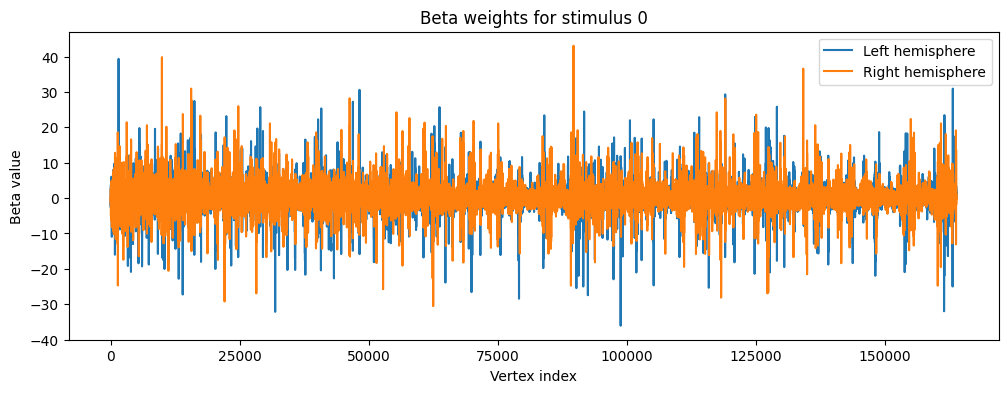

In [12]:
import matplotlib.pyplot as plt

stim_idx = 0  # change to view different stimuli

plt.figure(figsize=(12, 4))
plt.plot(lh_data[:, stim_idx], label='Left hemisphere')
plt.plot(rh_data[:, stim_idx], label='Right hemisphere')
plt.title(f'Beta weights for stimulus {stim_idx}')
plt.xlabel('Vertex index')
plt.ylabel('Beta value')
plt.legend()
plt.show()


Visualization Plus

In [16]:
lh = nib.load("/Users/precioux/Desktop/NeuroAI/NSD/nsddata_betas/ppdata/subj01/fsaverage/betas_fithrf/lh.betas_session01.mgh").get_fdata()
rh = nib.load("/Users/precioux/Desktop/NeuroAI/NSD/nsddata_betas/ppdata/subj01/fsaverage/betas_fithrf/rh.betas_session01.mgh").get_fdata()

# Squeeze to get (vertices, timepoints)
lh = np.squeeze(lh)
rh = np.squeeze(rh)


In [17]:
# Choose a stimulus
stim_idx = 0
lh_beta = lh[:, stim_idx]
rh_beta = rh[:, stim_idx]

In [11]:
print("RH beta min:", rh_beta.min())
print("RH beta max:", rh_beta.max())


RH beta min: -30.542665481567383
RH beta max: 43.077457427978516


In [18]:
print("RH beta shape:", rh_beta.shape)


RH beta shape: (163842,)


In [19]:
inflated_rh = "/Applications/freesurfer/8.0.0/subjects/fsaverage/surf/rh.inflated"
sulc_rh     = "/Applications/freesurfer/8.0.0/subjects/fsaverage/surf/rh.sulc"

inflated_lh = "/Applications/freesurfer/8.0.0/subjects/fsaverage/surf/lh.inflated"
sulc_lh     = "/Applications/freesurfer/8.0.0/subjects/fsaverage/surf/lh.sulc"


/var/folders/_m/qyd_78r54hlc3qlgxy6q01qm0000gn/T/ipykernel_7368/3987473193.py:3: DeprecationWarning: The `darkness` parameter will be deprecated in release 0.13. We recommend setting `darkness` to None
  plotting.plot_surf_stat_map(


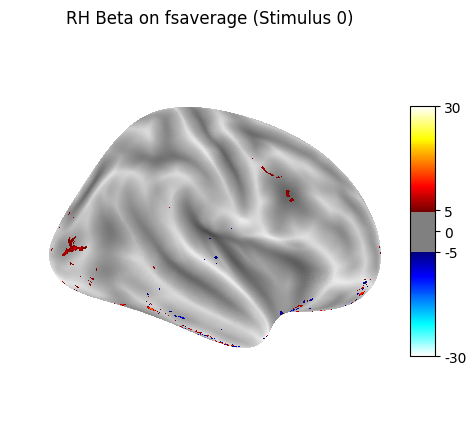

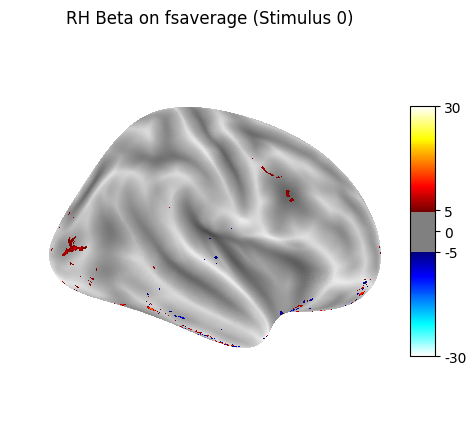

In [14]:
from nilearn import plotting

plotting.plot_surf_stat_map(
    inflated_rh,
    rh_beta,
    hemi='right',
    bg_map=sulc_rh,
    title='RH Beta on fsaverage (Stimulus 0)',
    threshold=5,
    vmax=30,
    cmap='cold_hot',
    colorbar=True
)


/var/folders/_m/qyd_78r54hlc3qlgxy6q01qm0000gn/T/ipykernel_3116/1274505821.py:3: DeprecationWarning: The `darkness` parameter will be deprecated in release 0.13. We recommend setting `darkness` to None
  plotting.plot_surf_stat_map(


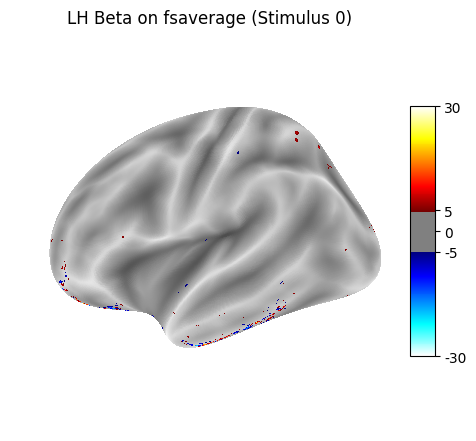

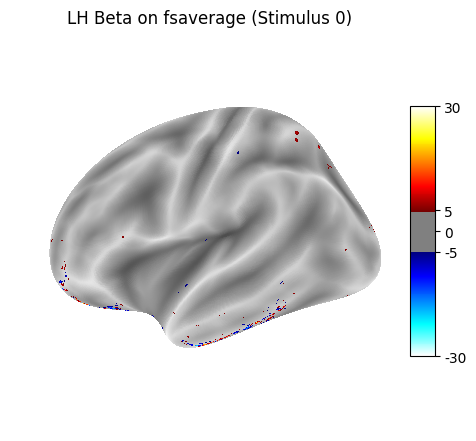

In [36]:
from nilearn import plotting

plotting.plot_surf_stat_map(
    inflated_lh,
    lh_beta,
    hemi='left',
    bg_map=sulc_lh,
    title='LH Beta on fsaverage (Stimulus 0)',
    threshold=5,
    vmax=30,
    cmap='cold_hot',
    colorbar=True
)


 # PCA
 

In [29]:
n_stimuli = 750
lh_data.shape = (163842, n_stimuli)
rh_data.shape = (163842, n_stimuli)


In [30]:
full_data = np.concatenate([lh_data, rh_data], axis=0)  # shape: (327684, n_stimuli)
full_data = full_data.T  # shape: (n_stimuli, 327684)


In [31]:
print(full_data.shape)


(750, 327684)


In [32]:
print(full_data[0, :10])  # First 10 vertex values of stimulus 0


[-1.97403276  0.98314589  1.43334615  0.39386508 -1.31482327 -1.52606475
  2.52077985 -0.32627237 -0.21575218 -0.52123564]


In [33]:
print("Mean:", full_data.mean())
print("Std:", full_data.std())
print("Min:", full_data.min())
print("Max:", full_data.max())


Mean: 0.28759148669867907
Std: 2.1748195766003993
Min: -96.1386489868164
Max: 85.21990203857422


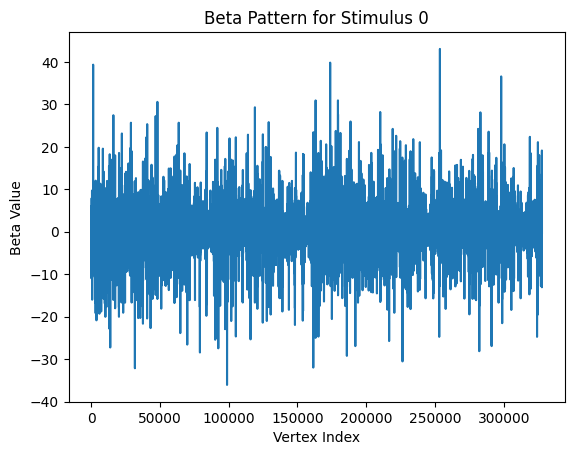

In [46]:
import matplotlib.pyplot as plt

plt.plot(full_data[0])
plt.title("Beta Pattern for Stimulus 0")
plt.xlabel("Vertex Index")
plt.ylabel("Beta Value")
plt.show()


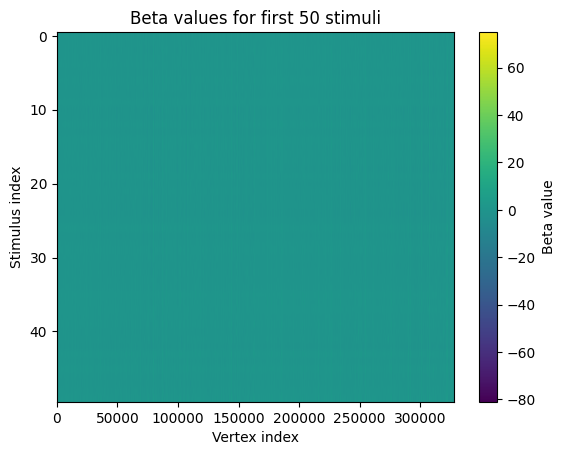

In [47]:
plt.imshow(full_data[:50], aspect='auto', cmap='viridis')  # first 50 stimuli
plt.colorbar(label='Beta value')
plt.title("Beta values for first 50 stimuli")
plt.xlabel("Vertex index")
plt.ylabel("Stimulus index")
plt.show()


In [36]:
from sklearn.decomposition import PCA


In [34]:
n_components = 100


In [37]:
pca = PCA(n_components=n_components)
encoded = pca.fit_transform(full_data)  # shape will be (750, 100)


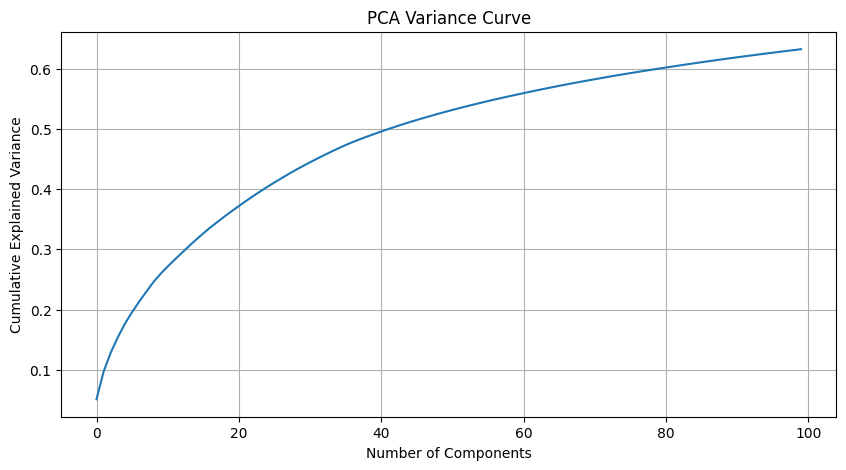

Cumulative explained variance: 0.6321744453664279
First 10 components: [0.05122539 0.04584722 0.03147454 0.02569526 0.02241724 0.01917023
 0.01743818 0.01644109 0.01601654 0.01357386]


In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Plot how much variance each component explains
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Variance Curve')
plt.grid(True)
plt.show()

# Optionally: print variance explained
print("Cumulative explained variance:", np.sum(pca.explained_variance_ratio_))
print("First 10 components:", pca.explained_variance_ratio_[:10])


In [52]:
pc_idx = 0
component = pca.components_[pc_idx]

# Split into hemispheres
lh_pc = component[:163842]
rh_pc = component[163842:]


/var/folders/_m/qyd_78r54hlc3qlgxy6q01qm0000gn/T/ipykernel_3116/2407755623.py:1: DeprecationWarning: The `darkness` parameter will be deprecated in release 0.13. We recommend setting `darkness` to None
  plotting.plot_surf_stat_map(


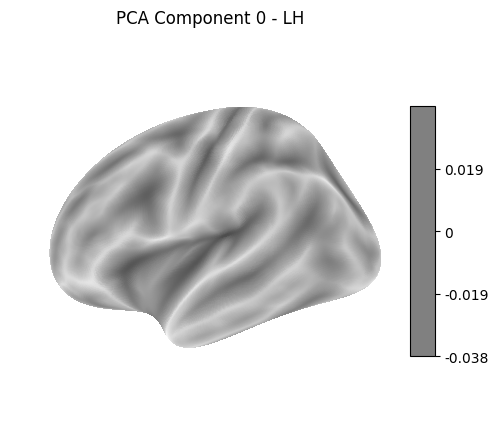

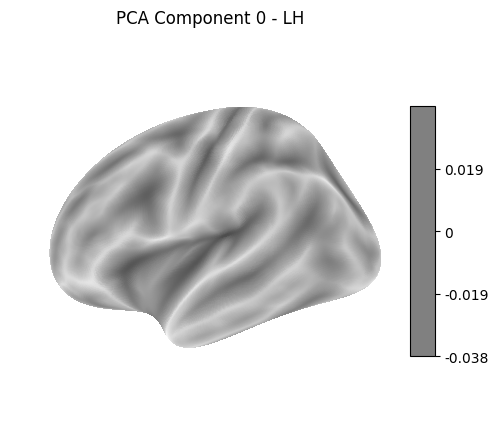

In [53]:
plotting.plot_surf_stat_map(
    inflated_lh,
    lh_pc,
    hemi='left',
    bg_map=sulc_lh,
    title=f'PCA Component {pc_idx} - LH',
    threshold=1,
    cmap='coolwarm',
    colorbar=True
)


/var/folders/_m/qyd_78r54hlc3qlgxy6q01qm0000gn/T/ipykernel_3116/1194262585.py:1: DeprecationWarning: The `darkness` parameter will be deprecated in release 0.13. We recommend setting `darkness` to None
  plotting.plot_surf_stat_map(


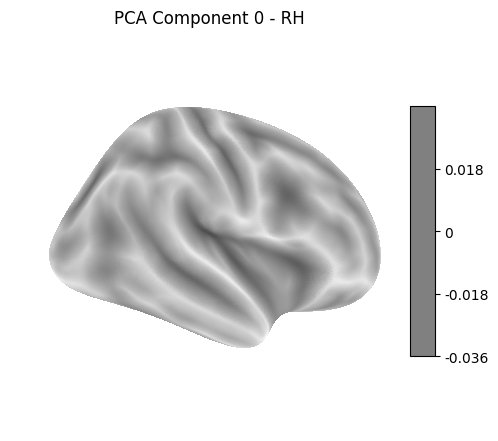

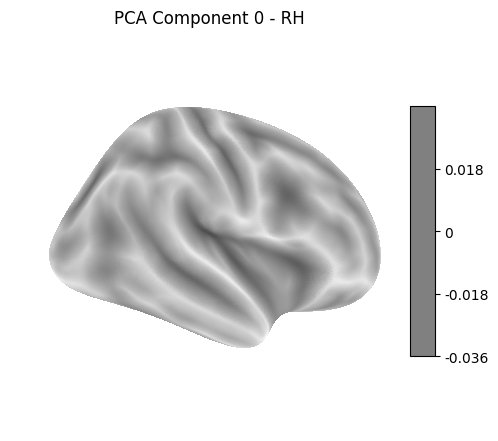

In [55]:
plotting.plot_surf_stat_map(
    inflated_rh,
    rh_pc,
    hemi='right',
    bg_map=sulc_rh,
    title=f'PCA Component {pc_idx} - RH',
    threshold=1,
    cmap='coolwarm',
    colorbar=True
)


/var/folders/_m/qyd_78r54hlc3qlgxy6q01qm0000gn/T/ipykernel_3116/3068165249.py:6: DeprecationWarning: The `darkness` parameter will be deprecated in release 0.13. We recommend setting `darkness` to None
  plotting.plot_surf_stat_map(


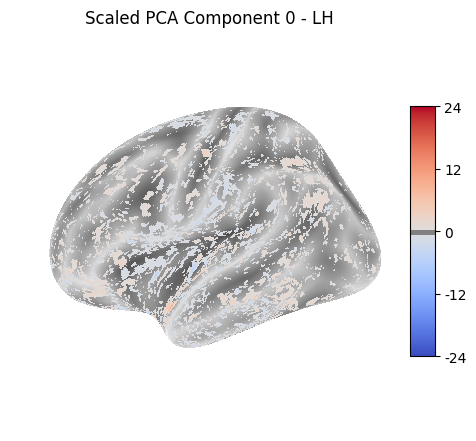

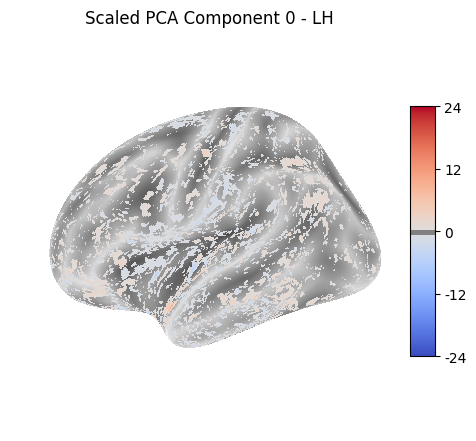

In [56]:
from sklearn.preprocessing import StandardScaler

# Scale for better contrast (not for modeling, just for visualization)
scaled_lh_pc = (lh_pc - lh_pc.mean()) / lh_pc.std()

plotting.plot_surf_stat_map(
    inflated_lh,
    scaled_lh_pc,
    hemi='left',
    bg_map=sulc_lh,
    title=f'Scaled PCA Component 0 - LH',
    threshold=0.5,  # now in std units
    cmap='coolwarm',
    colorbar=True
)


Creating dummy labels

In [39]:
X_pca = encoded
y_labels = np.arange(X_pca.shape[0])


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y_labels, test_size=0.2, random_state=42
)


In [41]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)


SVC(kernel='linear')

In [42]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = svc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("SVC Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))


SVC Accuracy: 0.0
Classification Report:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       1.0
          23       0.00      0.00      0.00       1.0
          25       0.00      0.00      0.00       0.0
          27       0.00      0.00      0.00       0.0
          28       0.00      0.00      0.00       0.0
          30       0.00      0.00      0.00       1.0
          31       0.00      0.00      0.00       1.0
          32       0.00      0.00      0.00       0.0
          33       0.00      0.00      0.00       1.0
          39       0.00      0.00      0.00       1.0
          49       0.00      0.00      0.00       1.0
          52       0.00      0.00      0.00       0.0
          54       0.00      0.00      0

/Users/precioux/Documents/Self-work/courses/pythonProject1/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/precioux/Documents/Self-work/courses/pythonProject1/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/precioux/Documents/Self-work/courses/pythonProject1/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramet

In [44]:
from sklearn.decomposition import PCA

n_components = 500
pca = PCA(n_components=n_components)
encoded = pca.fit_transform(full_data)  # shape: (750, 3000)


In [45]:
print("Encoded shape:", encoded.shape)


Encoded shape: (750, 500)


In [46]:
# Dummy example: suppose labels are stimulus indices (0 to 749)
labels = np.arange(750)


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    encoded, labels, test_size=0.2, random_state=42, stratify=labels
)


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

10 Sessions

In [48]:
import numpy as np
import nibabel as nib

base_path = "/Users/precioux/Desktop/NeuroAI/NSD/nsddata_betas/ppdata/subj01/fsaverage/betas_fithrf/"
all_sessions = []

for i in range(1, 11):
    session_num = f"{i:02d}"  # '01', '02', ..., '10'

    # Load right hemisphere
    rh_path = base_path + f"rh.betas_session{session_num}.mgh"
    rh_data = np.squeeze(nib.load(rh_path).get_fdata()).T  # shape: (trials, vertices)

    # Load left hemisphere
    lh_path = base_path + f"lh.betas_session{session_num}.mgh"
    lh_data = np.squeeze(nib.load(lh_path).get_fdata()).T  # shape: (trials, vertices)

    # Concatenate vertices of both hemispheres
    full_hemisphere_data = np.concatenate([lh_data, rh_data], axis=1)  # shape: (trials, lh+rh vertices)

    all_sessions.append(full_hemisphere_data)

# Final shape: (trials_total, vertices_combined)
full_data_10sessions = np.concatenate(all_sessions, axis=0)

print("Final shape (samples x vertices):", full_data_10sessions.shape)


Final shape (samples x vertices): (7500, 327684)
